# Exploratory Data Analysis

In [12]:
import pandas as pd

df = pd.read_csv("cps_data_filtered.csv")
print(df.info())
print(df.describe(include='all').transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354420 entries, 0 to 354419
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       354420 non-null  int64  
 1   SERIAL     354420 non-null  int64  
 2   MONTH      354420 non-null  int64  
 3   AGE        354420 non-null  int64  
 4   SEX        354420 non-null  int64  
 5   RACE       354420 non-null  int64  
 6   EMPSTAT    354420 non-null  int64  
 7   LABFORCE   354420 non-null  int64  
 8   OCC        354420 non-null  int64  
 9   IND        354420 non-null  int64  
 10  UHRSWORK1  354420 non-null  int64  
 11  EDUC       354420 non-null  int64  
 12  INCWAGE    354420 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 35.2 MB
None
              count          mean           std     min      25%      50%  \
YEAR       354420.0   2021.963969      1.411120  2020.0   2021.0   2022.0   
SERIAL     354420.0  46083.354689  26457.548355     1.0  23124.

Plot Raw Wage Distribution

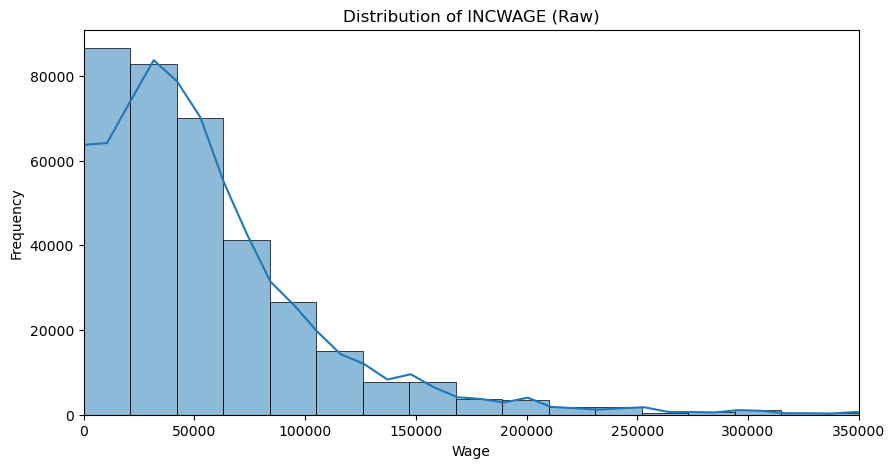

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['INCWAGE'], bins=100, kde=True)
plt.title('Distribution of INCWAGE (Raw)')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.xlim(0, df['INCWAGE'].quantile(0.99))  # trim long tail
plt.show()


Plot Log-Transformed Wage Distribution

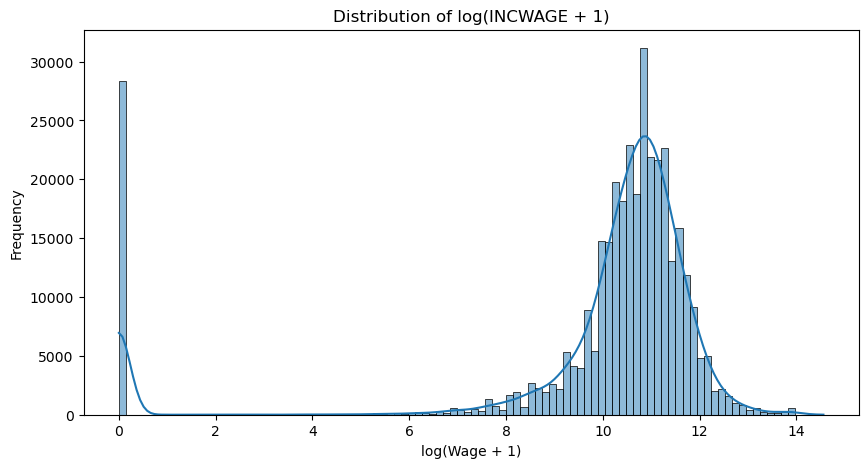

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['INCWAGE']), bins=100, kde=True)
plt.title('Distribution of log(INCWAGE + 1)')
plt.xlabel('log(Wage + 1)')
plt.ylabel('Frequency')
plt.show()


Drop 0 value

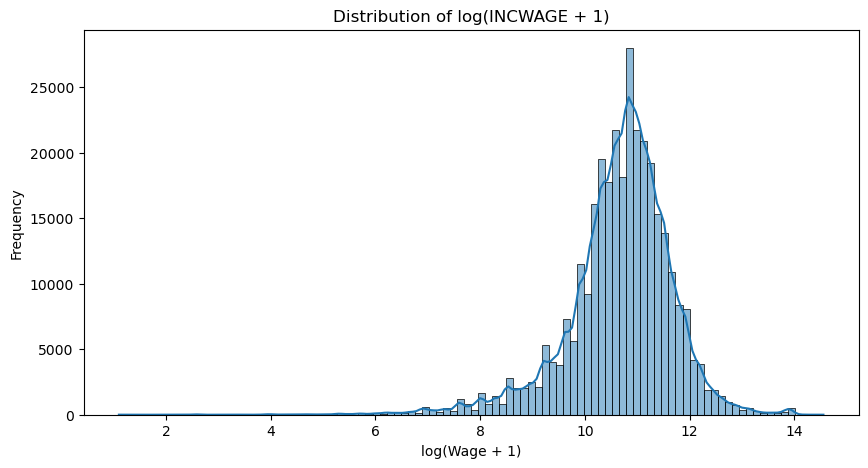

In [18]:
df = df[df['INCWAGE'] > 0]
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['INCWAGE']), bins=100, kde=True)
plt.title('Distribution of log(INCWAGE + 1)')
plt.xlabel('log(Wage + 1)')
plt.ylabel('Frequency')
plt.show()

Boxplot by Gender

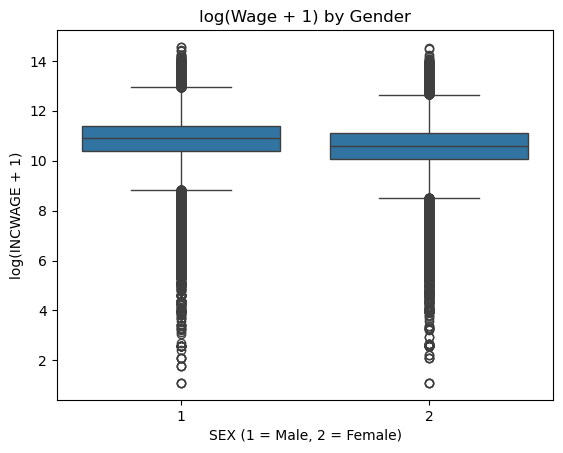

In [17]:
sns.boxplot(x=df['SEX'], y=np.log1p(df['INCWAGE']))
plt.title("log(Wage + 1) by Gender")
plt.xlabel("SEX (1 = Male, 2 = Female)")
plt.ylabel("log(INCWAGE + 1)")
plt.show()


Median log wages for men (SEX = 1) appear slightly higher than for women (SEX = 2).

The spread and upper quantiles also suggest men are more represented in higher wage brackets.

This indicates a raw wage gap in the distribution of earnings.